# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
#import scipy.stats
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [23]:
medical.shape

(1338, 8)

In [24]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

In [25]:
sample_mean_charges = np.mean(medical['charges'])
sample_mean_charges

13270.422265141257

In [26]:
sample_std_charges = np.std(medical['charges']) #Bessel's correction only changes std by about 5 here
sample_std_charges

12105.484975561605

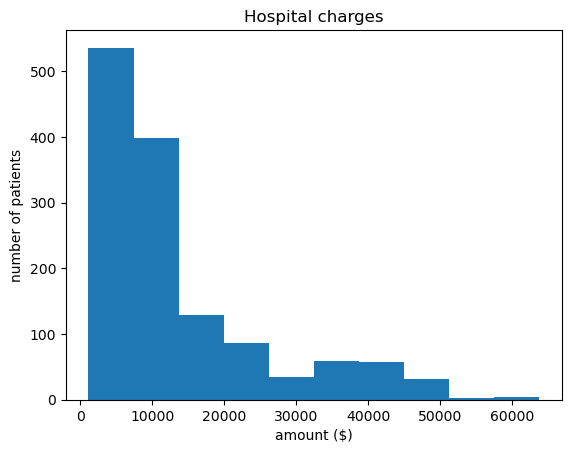

In [27]:
_ = plt.hist(medical['charges'], bins = 10)
_ = plt.xlabel('amount ($)')
_ = plt.ylabel('number of patients')
_ = plt.title('Hospital charges')

In [28]:
sample_med_charges = np.median(medical['charges'])
sample_med_charges

9382.033

The mean of the hospital charges seems to be influenced by the exceptionally high medical bills that are outliers. The median is only 9,382.03, showing how the data are skewed. The data has a lot of variability, with a standard deviation of over 12,105. This is not surprising at all for a random sample of medical charges. The majority of hospital stays have lower costs but bills to insurance and the patients can be astronomically high depending on the illness or injury.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Even though we do not know much about the distribution of the actual medical charges at the hospital, we know that the mean of our single random sample is one sample from the distribution of the sample mean, which (by the CLT) is approximately normal with mean equal to the mean of the population of medical charges. Given this fact and the single sample we have taken, we can perform a hypothesis test to see how unlikely the sample mean of about 13,270 would be if the population mean were indeed less than or equal to 12,000.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ A one-sided interval is appropriate here because the administrator is concerned with how far below 12,000 the mean medical bill may be and not how much it potentially differs from 12,000. Anything above that number is considered acceptable for the hospital.

In [29]:
alpha = 0.05
standard_error = sample_std_charges/np.sqrt(1338)
standard_error

330.943713906084

In [30]:
t_value = round(t.ppf(1 - alpha, 1337), 2)
t_value

1.65

In [31]:
moe = t_value * standard_error
#moe
conf_lower = 12000 - moe
conf_upper = 12000 + moe

"95% confidence interval: " + str(conf_lower) + ", " + str(conf_upper)

'95% confidence interval: 11453.942872054962, 12546.057127945038'

__A:__ Looking at this confidence interval, we can see that if the mean charge were 12000 then we would expect 95% of sample means to be in the above range, so the sample mean we obtained (13,270.42) would be highly unlikely. the administrator probably does not need to be concerned at this point.

To describe this another way, we can calculate the t-statistic manually and see that it is quite high, so the observed sample mean is many standard errors above 12000. 

Lastly, performing a hypothesis test with the software further confirms that the mean medical charge has probably not fallen too low.

In [32]:
t_statistic = (sample_mean_charges - 12000)/standard_error
t_statistic

3.838786511901477

In [33]:
#One-tailed t-test
#Null hypothesis: mean is less than or equal to 12000
t_statistic, p_value = scipy.stats.ttest_1samp(medical['charges'], popmean=12000, alternative='greater')

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis (i.e., conclude that mean is significantly greater than 12000)")
else:
    print("Fail to reject the null hypothesis")

t-statistic: 3.8373517196585314
p-value: 6.508582604643598e-05
Reject the null hypothesis (i.e., conclude that mean is significantly greater than 12000)


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Null hypothesis: There is no difference in charge between people with insurance and those without.
Alternative hypothesis: There is a significant difference in how much people with insurance and those without are charged.

We assume the variances of the two groups are equal, so we are able to perform a two-sample t-test for the difference between the means.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [34]:
no_ins_sample = medical[medical['insuranceclaim'] == 0]['charges']
ins_sample = medical[medical['insuranceclaim'] == 1]['charges']

n_0 = len(no_ins_sample)
n_1 = len(ins_sample)
#n_0 + n_1

mean_0 = np.mean(no_ins_sample)
mean_1 = np.mean(ins_sample)

std_0 = np.std(no_ins_sample)
std_1 = np.std(ins_sample)

In [35]:
s_p = np.sqrt(((n_0 - 1) * std_0 ** 2 + (n_1 - 1) * std_1 ** 2)/(n_0 + n_1 - 2))
s_p

11512.282899205744

In [36]:
t_statistic = (mean_0 - mean_1)/(s_p * np.sqrt((1 / n_0) + (1 / n_1)))
t_statistic

-11.90130694355539

In [37]:
dof = n_0 + n_1 - 2
pval = scipy.stats.t.sf(np.abs(t_statistic), dof)*2
pval

4.090550214373503e-31

In [40]:
t_statistic, p_value = scipy.stats.ttest_ind(no_ins_sample, ins_sample)

alpha = 0.05
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means of the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means of the two groups.")

t-statistic: -11.893299030876712
p-value: 4.461230231620717e-31
Reject the null hypothesis: There is a significant difference between the means of the two groups.


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ There appears to be no equivalent function for a two-sample z-test. This may be because such a test requires knowledge of the population standard deviation and is therefore not as common or useful.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test